# Lineare Regression

Ausgewählte statistische Kennzahlen der 19 Wohnviertel der Stadt Basel sowie der zwei Gemeinden Riehen und Bettingen seit 2015. 

Daten können von diesem Link bezogen werden https://opendata.swiss/de/dataset/kennzahlen-zu-den-basler-wohnvierteln-und-landgemeinden 

## Import

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
%matplotlib inline

## Datenverständnis und -aufbereitung

In [89]:
df = pd.read_csv('Daten_BS.csv', sep = ';' ).round(3)

In [90]:
df.head()

,publikationsjahr,wohnviertel_id,wohnviertel_name,anteil_sozialhilfeempfaenger,anteil_auslaender,anteil_personen_ohne_religionszugehoerigkeit,anteil_personen_in_einpersonenhaushalten,gymnasialquote,altersquotient,anteil_sesshafte,...,baujahr_der_wohngebaeude,anteil_einfamilienhaeuser,anteil_gruenflaechen,flaeche_pro_wohnung,wohnflaeche_pro_person,vermoegenssteuer_pro_veranlagung,einkommenssteuer_pro_veranlagung,erwerbstaetigenquote,arbeitsplaetze_pro_einwohner,arbeitslosenquote
0,2015,5,St. Alban,0.032,0.309,0.472,0.251,0.479,0.490,0.347,...,1938.668,0.340,0.323,93.782,49.810,3839.556,15620.768,0.729,2.196,0.030
1,2015,14,Wettstein,0.048,0.295,0.511,0.272,0.597,0.301,0.363,...,1933.202,0.339,0.275,83.081,45.870,1688.972,9934.161,0.773,1.812,0.031
2,2015,16,Rosental,0.107,0.544,0.385,0.214,0.092,0.130,0.231,...,1945.958,0.052,0.084,69.306,33.393,225.052,5816.176,0.700,0.976,0.056
3,2015,20,Riehen,0.033,0.241,0.459,0.165,0.522,0.489,0.434,...,1956.933,0.661,0.797,102.951,47.777,2958.972,13108.316,0.733,0.160,0.019
4,2015,30,Bettingen,0.015,0.277,0.422,0.111,0.667,0.406,0.410,...,1961.971,0.791,0.903,121.407,51.261,2692.619,13426.116,0.733,0.294,0.019


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 21 columns):
publikationsjahr                                126 non-null int64
wohnviertel_id                                  126 non-null int64
wohnviertel_name                                126 non-null object
anteil_sozialhilfeempfaenger                    126 non-null float64
anteil_auslaender                               126 non-null float64
anteil_personen_ohne_religionszugehoerigkeit    105 non-null float64
anteil_personen_in_einpersonenhaushalten        126 non-null float64
gymnasialquote                                  126 non-null float64
altersquotient                                  126 non-null float64
anteil_sesshafte                                126 non-null float64
jugendquotient                                  126 non-null float64
baujahr_der_wohngebaeude                        126 non-null float64
anteil_einfamilienhaeuser                       126 non-null float64
ant

In [116]:
df.describe()

,publikationsjahr,wohnviertel_id,anteil_sozialhilfeempfaenger,anteil_auslaender,anteil_personen_ohne_religionszugehoerigkeit,anteil_personen_in_einpersonenhaushalten,gymnasialquote,altersquotient,anteil_sesshafte,jugendquotient,baujahr_der_wohngebaeude,anteil_einfamilienhaeuser,anteil_gruenflaechen,flaeche_pro_wohnung,wohnflaeche_pro_person,vermoegenssteuer_pro_veranlagung,einkommenssteuer_pro_veranlagung,erwerbstaetigenquote,arbeitsplaetze_pro_einwohner,arbeitslosenquote
count,126.000000,126.000000,126.000000,126.000000,105.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,105.000000
mean,2017.500000,11.428571,0.061429,0.359222,0.476162,0.243770,0.422873,0.318444,0.340762,0.254508,1928.213968,0.282325,0.326413,81.215786,42.131722,2869.305675,10163.398532,0.731992,1.111087,0.039743
std,1.714643,7.021599,0.037348,0.099900,0.042946,0.055665,0.177052,0.095788,0.055687,0.067857,29.426277,0.249764,0.232356,15.093186,6.674171,4141.052184,4646.332899,0.053304,1.251565,0.015629
min,2015.000000,1.000000,0.012000,0.210000,0.381000,0.111000,0.092000,0.118000,0.189000,0.119000,1822.578000,0.019000,0.067000,65.325000,31.681000,162.198000,4303.549000,0.609000,0.118000,0.015000
25%,2016.000000,6.000000,0.032000,0.271750,0.452000,0.211000,0.273750,0.250500,0.307000,0.209500,1925.078500,0.077000,0.160000,70.008500,36.579250,475.006500,6395.728000,0.703000,0.191000,0.025000
50%,2017.500000,11.000000,0.049000,0.351500,0.474000,0.246500,0.373500,0.325500,0.335500,0.254000,1934.161500,0.167000,0.272000,74.796000,41.526500,1117.335000,8422.123500,0.737000,0.639000,0.039000
75%,2019.000000,16.000000,0.089000,0.434000,0.500000,0.281750,0.583250,0.375000,0.365000,0.297750,1942.064500,0.369000,0.370500,90.346750,47.675500,3735.967500,13428.137250,0.768250,1.655750,0.050000
max,2020.000000,30.000000,0.143000,0.559000,0.571000,0.352000,0.824000,0.491000,0.434000,0.400000,1962.448000,0.794000,0.903000,121.407000,55.740000,20903.359000,22686.809000,0.856000,4.603000,0.072000


In [10]:
type(df['wohnviertel_name'])

pandas.core.series.Series

In [93]:
df.columns
df1 = df.drop(['publikationsjahr', 'wohnviertel_id', 'wohnviertel_name'],axis=1).dropna()
df1.head()

,anteil_sozialhilfeempfaenger,anteil_auslaender,anteil_personen_ohne_religionszugehoerigkeit,anteil_personen_in_einpersonenhaushalten,gymnasialquote,altersquotient,anteil_sesshafte,jugendquotient,baujahr_der_wohngebaeude,anteil_einfamilienhaeuser,anteil_gruenflaechen,flaeche_pro_wohnung,wohnflaeche_pro_person,vermoegenssteuer_pro_veranlagung,einkommenssteuer_pro_veranlagung,erwerbstaetigenquote,arbeitsplaetze_pro_einwohner,arbeitslosenquote
0,0.032,0.309,0.472,0.251,0.479,0.490,0.347,0.278,1938.668,0.340,0.323,93.782,49.810,3839.556,15620.768,0.729,2.196,0.030
1,0.048,0.295,0.511,0.272,0.597,0.301,0.363,0.215,1933.202,0.339,0.275,83.081,45.870,1688.972,9934.161,0.773,1.812,0.031
2,0.107,0.544,0.385,0.214,0.092,0.130,0.231,0.263,1945.958,0.052,0.084,69.306,33.393,225.052,5816.176,0.700,0.976,0.056
3,0.033,0.241,0.459,0.165,0.522,0.489,0.434,0.351,1956.933,0.661,0.797,102.951,47.777,2958.972,13108.316,0.733,0.160,0.019
4,0.015,0.277,0.422,0.111,0.667,0.406,0.410,0.297,1961.971,0.791,0.903,121.407,51.261,2692.619,13426.116,0.733,0.294,0.019


### Eine Heatmap mit der Korrelationsmatrix

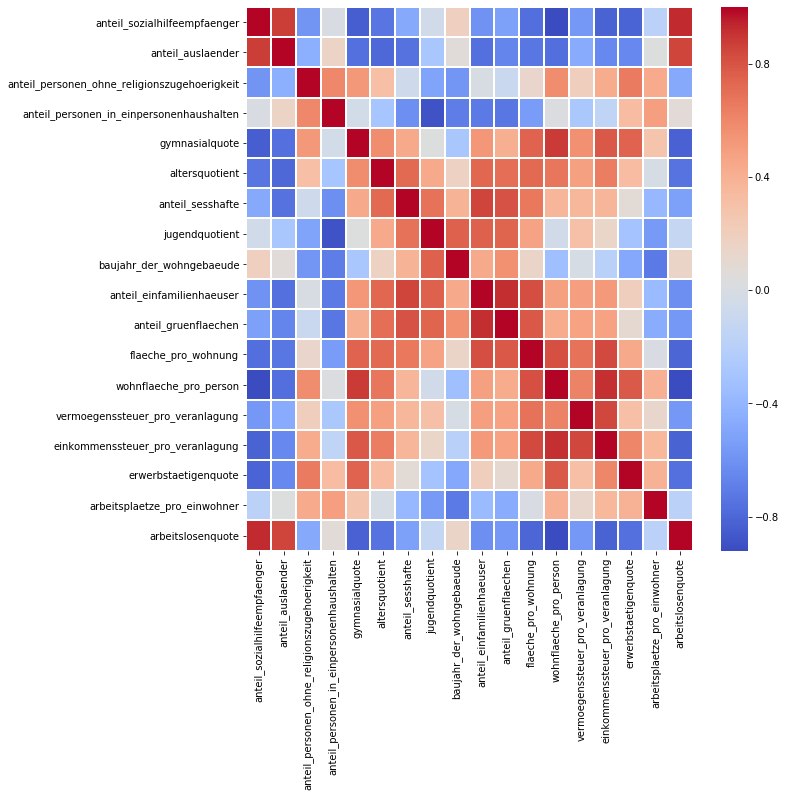

In [122]:
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(), cmap='coolwarm', linecolor='white',linewidths=1)
plt.show()

### Ein Jointplot mit der Erwerbstätigenquote und der Gymnasialquote

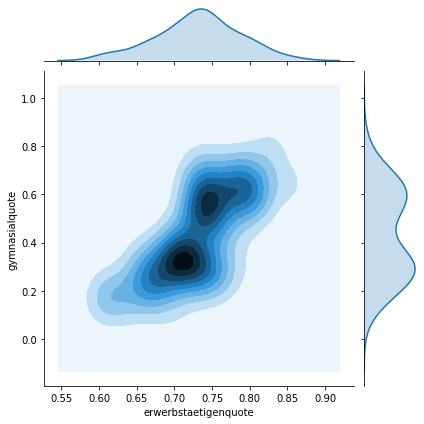

In [143]:
sns.jointplot(x='erwerbstaetigenquote', y='gymnasialquote', data=df1, kind='kde')
plt.show()

In [135]:
df1['erwerbstaetigenquote'].median()

0.737

In [136]:
df1['gymnasialquote'].median()

0.377

## Modellierung

In [95]:
lm = LinearRegression()

In [96]:
X = df1.drop('einkommenssteuer_pro_veranlagung', axis=1)
y = df1['einkommenssteuer_pro_veranlagung']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [98]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluation

In [99]:
print(lm.coef_)

[-2.93173689e+03 -2.44002160e+03  1.85209880e+04 -3.11116316e+04
 -3.23042343e+03 -4.54325436e+03 -4.75293870e+03  2.26388865e+04
 -1.37572178e+00 -7.41822005e+03  1.80629930e+02 -1.01613952e+02
  8.62712716e+02  3.94124745e-01 -9.04700173e+03 -3.88811142e+01
 -1.65023256e+04]


In [126]:
print(lm.intercept_)

-8572.134815949608


In [100]:
pd.DataFrame(lm.coef_, X_train.columns, ['Koeffizient'])

,Koeffizient
anteil_sozialhilfeempfaenger,-2931.736893
anteil_auslaender,-2440.021599
anteil_personen_ohne_religionszugehoerigkeit,18520.988045
anteil_personen_in_einpersonenhaushalten,-31111.631620
gymnasialquote,-3230.423427
altersquotient,-4543.254364
anteil_sesshafte,-4752.938704
jugendquotient,22638.886456
baujahr_der_wohngebaeude,-1.375722
anteil_einfamilienhaeuser,-7418.220055


In [101]:
preds = lm.predict(X_test)
preds

array([ 6339.2088282 ,  6854.13250495,  6139.33653927,  8794.50271678,
        7331.37535658,  8958.18461924,  9889.87745652,  8647.94536377,
       14035.30903353, 11969.50194226, 17417.78604883, 16903.06436357,
        6260.73139046, 15782.63981425,  5585.20095227,  5102.70097897,
       13434.10203554,  4590.33610455, 19781.97712205,  4719.38714849,
       14907.2052223 , 13933.58158399, 10854.39221876, 10430.99245489,
        6611.02346233, 14731.88873733,  5818.16972766, 17160.33298643,
        7117.65025324,  9690.88945725, 16323.52538072,  7226.47118246])

C:\Users\berwegert\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


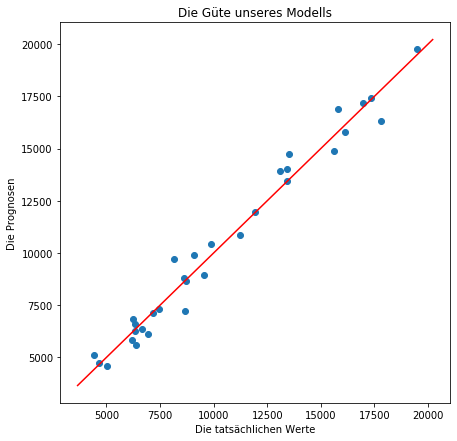

In [147]:
plt.figure(figsize = (7,7))
plt.scatter(y_test,preds)
ax = plt.axes()
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, 'red')
plt.ylabel('Die Prognosen')
plt.xlabel('Die tatsächlichen Werte')
plt.title('Die Güte unseres Modells')
plt.show()

### Metriken zur Bewertung des Modells: Errors und R2

In [151]:
#Der mittlere absolute Fehler (englisch: Mean Absolute Error, kurz: MAE)
MAE = metrics.mean_absolute_error(y_test, preds).round(2)

In [152]:
# Der mittlere quadratische Fehler (englisch: Mean Squared Error, kurz: MSE)
MSE = metrics.mean_squared_error(y_test, preds).round(2)

In [153]:
# Wurzel der mittleren Fehlerquadratsumme (englisch: Root-mean-square error, kurz: RMSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, preds)).round(2)

In [156]:
#Das Bestimmtheitsmass R2 (englisch: Coefficient of determination, R2 or r2 , ausgsprochen "R squared")
r2 = metrics.r2_score(y_test, preds).round(3)

In [157]:
print('Der MAE beträgt:' , MAE)
print('-'*40)
print('Der MSE beträgt:' , MSE)
print('-'*40)
print('Der RMSE beträgt:' , RMSE)
print('-'*40)  
print('R2 beträgt:' ,r2 )

Der MAE beträgt: 537.03
----------------------------------------
Der MSE beträgt: 484050.26
----------------------------------------
Der RMSE beträgt: 695.74
----------------------------------------
R2 beträgt: 0.974
